In [1]:
import numpy as np
import matplotlib.pyplot as plt

In [2]:
def blasius_system(eta, y):
    f = y[0]
    df = y[1]
    ddf = y[2]
    return np.array([df, ddf, -0.5 * f * ddf])

In [3]:
def rk4_step(func, t, y, h):
    k1 = h * func(t, y)
    k2 = h * func(t + 0.5*h, y + 0.5*k1)
    k3 = h * func(t + 0.5*h, y + 0.5*k2)
    k4 = h * func(t + h, y + k3)
    return y + (k1 + 2*k2 + 2*k3 + k4) / 6

In [4]:
def integrate_blasius(guess, eta_max=10, h=0.02):
    steps = int(eta_max / h)
    y = np.array([0.0, 0.0, guess])
    
    for i in range(steps):
        y = rk4_step(blasius_system, i*h, y, h)
        
    return y[1]

In [5]:
def bisection_shooting(target=1.0, tol=1e-7, max_iter=50):
    low = 0.0
    high = 1.0
    
    print(f"{'Iter':<5} | {'f\"(0) Guess':<12} | {'f\'(inf)':<12} | {'Error':<12}")
    print("-" * 50)
    
    for i in range(max_iter):
        mid = (low + high) / 2
        f_prime_inf = integrate_blasius(mid)
        error = f_prime_inf - target
        
        print(f"{i:<5} | {mid:<12.6f} | {f_prime_inf:<12.6f} | {error:<12.3e}")
        
        if abs(error) < tol:
            return mid
        if error < 0:
            low = mid   
        else:
            high = mid  
            
    return mid

In [6]:
best = bisection_shooting()

Iter  | f"(0) Guess  | f'(inf)      | Error       
--------------------------------------------------
0     | 0.500000     | 1.313725     | 3.137e-01   
1     | 0.250000     | 0.827595     | -1.724e-01  
2     | 0.375000     | 1.084456     | 8.446e-02   
3     | 0.312500     | 0.960339     | -3.966e-02  
4     | 0.343750     | 1.023340     | 2.334e-02   
5     | 0.328125     | 0.992089     | -7.911e-03  
6     | 0.335938     | 1.007775     | 7.775e-03   
7     | 0.332031     | 0.999948     | -5.238e-05  
8     | 0.333984     | 1.003865     | 3.865e-03   
9     | 0.333008     | 1.001907     | 1.907e-03   
10    | 0.332520     | 1.000928     | 9.277e-04   
11    | 0.332275     | 1.000438     | 4.377e-04   
12    | 0.332153     | 1.000193     | 1.927e-04   
13    | 0.332092     | 1.000070     | 7.016e-05   
14    | 0.332062     | 1.000009     | 8.895e-06   
15    | 0.332047     | 0.999978     | -2.174e-05  
16    | 0.332054     | 0.999994     | -6.423e-06  
17    | 0.332058     | 1.000001

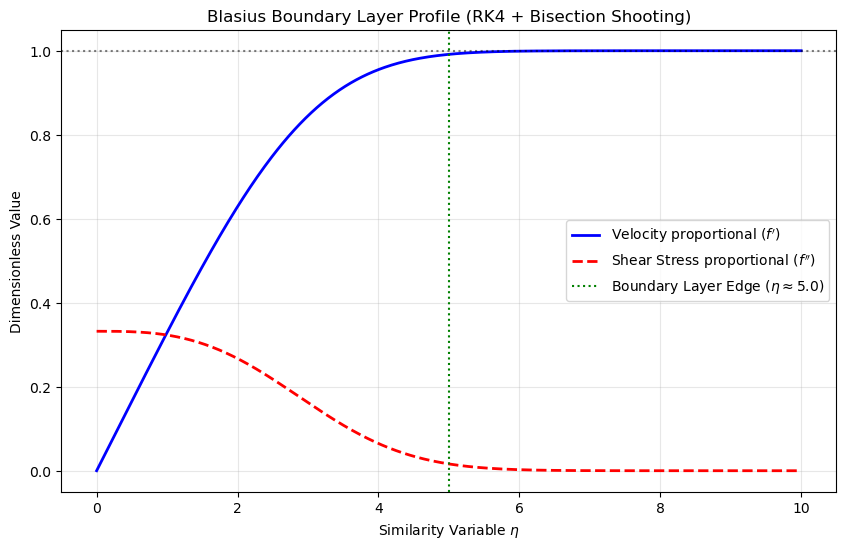

In [7]:
eta_max = 10
h = 0.02
steps = int(eta_max / h)
eta_vals = np.linspace(0, eta_max, steps)
results = np.zeros((steps, 3))
y_state = np.array([0.0, 0.0, best])

for i in range(steps):
    results[i] = y_state
    y_state = rk4_step(blasius_system, eta_vals[i], y_state, h)
plt.figure(figsize=(10, 6))
plt.plot(eta_vals, results[:, 1], 'b-', lw=2, label=r"Velocity proportional ($f'$)")
plt.plot(eta_vals, results[:, 2], 'r--', lw=2, label=r"Shear Stress proportional ($f''$)")
plt.axhline(1.0, color='k', linestyle=':', alpha=0.5)
plt.axvline(5.0, color='g', linestyle=':', label=r"Boundary Layer Edge ($\eta \approx 5.0$)")

plt.title("Blasius Boundary Layer Profile (RK4 + Bisection Shooting)")
plt.xlabel(r"Similarity Variable $\eta$")
plt.ylabel("Dimensionless Value")
plt.legend()
plt.grid(True, alpha=0.3)
plt.show()

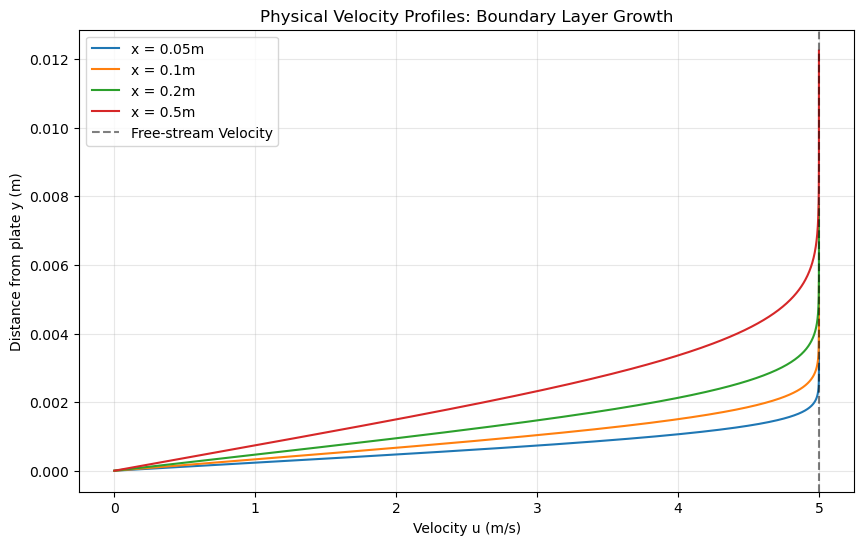

In [8]:
U_inf = 5.0      
nu = 1.5e-5      
x_positions = [0.05, 0.1, 0.2, 0.5] 

plt.figure(figsize=(10, 6))

for x in x_positions:
    y_phys = eta_vals * np.sqrt(nu * x / U_inf)
    u_phys = U_inf * results[:, 1]
    
    plt.plot(u_phys, y_phys, label=f'x = {x}m')

plt.axvline(U_inf, color='k', linestyle='--', alpha=0.5, label='Free-stream Velocity')
plt.title("Physical Velocity Profiles: Boundary Layer Growth")
plt.xlabel("Velocity u (m/s)")
plt.ylabel("Distance from plate y (m)")
plt.legend()
plt.grid(True, alpha=0.3)
plt.show()

## OBSERVATION
On the far left, all curves start at 0. This is the no-slip condition, where the fluid layer in direct contact with the plate is completely stationary.
The dashed vertical line at 5 m/s is the speed of the fluid far away from the plate. Every curve eventually "reaches" this speed.
As the fluid moves downstream, the viscous effects (friction) have more time to diffuse upward.
Near the front (0.05 m), the plate hasn't had much time to slow down the fluid above it.
Further back (0.5 m), the cumulative effect of the stationary plate has "dragged" on more layers of fluid, pushing the edge of the boundary layer (δ) higher.

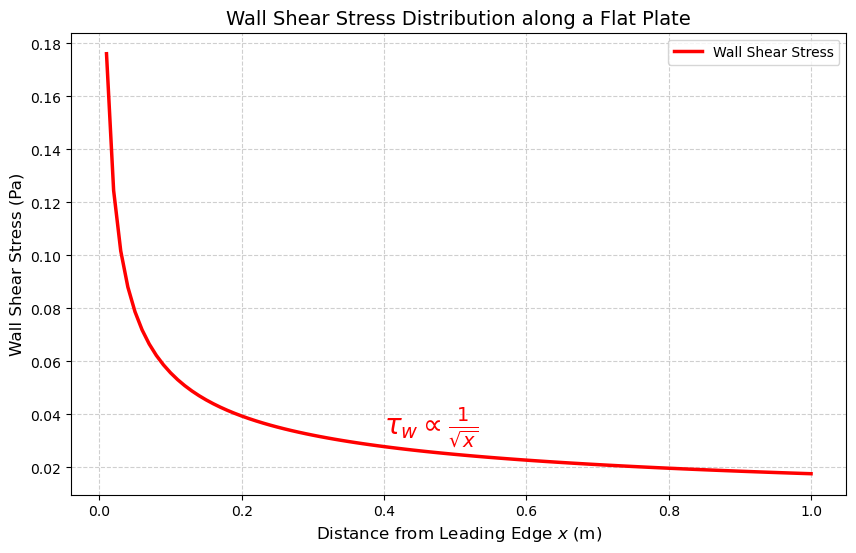

In [10]:
rho = 1.225      
nu = 1.5e-5      
mu = rho * nu   
U_inf = 5.0     
best = 0.3320

x_vals = np.linspace(0.01, 1.0, 100)

tau_w = mu * U_inf * np.sqrt(U_inf / (nu * x_vals)) * best

plt.figure(figsize=(10, 6))
plt.plot(x_vals, tau_w, 'r-', lw=2.5, label=r'Wall Shear Stress')
plt.title("Wall Shear Stress Distribution along a Flat Plate", fontsize=14)
plt.xlabel("Distance from Leading Edge $x$ (m)", fontsize=12)
plt.ylabel("Wall Shear Stress (Pa)", fontsize=12)
plt.grid(True, linestyle='--', alpha=0.6)
plt.legend()

plt.text(0.4, np.mean(tau_w), r'$\tau_w \propto \frac{1}{\sqrt{x}}$', 
         fontsize=20, color='red', fontweight='bold')

plt.show()

## OBSERVATION
At the very start, the shear stress is extremely high. This is because the boundary layer is infinitely thin there, creating a very sharp velocity gradient.
Inverse Square Root Relationship: As the distance x increases, the shear stress drops rapidly.
As we move further downstream, the growing boundary layer acts like a "cushion" of slow-moving fluid. This shields the plate from the fast-moving free stream, which results in lower friction (shear stress) further back on the plate.